# Chapter2:From model to production
---
## Starting your project
Working on a real project get you a real experince building and using models. When selecting a prject, the most important consideration is <span style="color: red;">Data availability</span>. 
## Computer vision
- `Object Recognitioin`:Computers can recognize items in an image
- `Object Detection`:Computers can recognize where objects in an image, And can highlight their locations and name each found object.
  - `segmentation` is a part of this field where every pixel is categorized based on the kind of object it is part of.

DL algorithms generally not good at recognizing images that are significantly different in structure from those used to train the model. (e.g. if there were no black and white images in the training data, the model may
do poorly on black-and-white images).

Data augmentation : Synthetically expands a dataset by creating modified copies of existing data, like rotating or flipping images, to train machine learning models better, preventing overfitting, and improving their ability to generalize to new, unseen data, especially when the original dataset is small.

# Drivetrain Approach
Is a strategic approach for building data products using Ai, Its main goal is to ensure that data is used to produce actionable results tather than just generating predictions.
### Core idea
The basic idea is to start with considering your objective, then think about what actions you can take to meet that objective and what data you have (or can acquire) that can help, and then build a model that you can use to determine the best actions to take to get the best results in terms of your objective

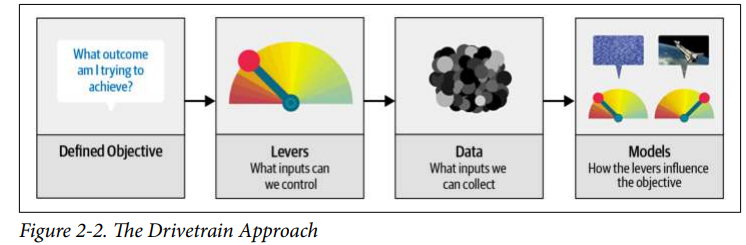

### The 4 Steps of the Drivetrain Approach
1-Define the objective: what is the result we want to achieve?. EX: For an e-commerce store, the goal isn't just to "predict sales," but to "maximize net profit 

2-Define the Levers (inputs we can control): What are the inputs you can control or change to influence the objective?. EX: Price

3-Collect the Data: What data do you need to link the "Levers" to the "Objective"?

4-Build the model: The models here don't just predict the future; they predict how pulling different levers will impact the objective.

Ex: Build a model that predicts: "If we set the price to 100, we sell 50 units. If we set it to 90, we sell 80 units." Then, we pick the price that results in the highest total profit.

---
# Gathering Data
For many types of projects we might find a data we need online(e.g. Kaggle).
Models can reflect only the data used to train them (biased), We must carefully consider the types of data.
# From Data to DataLoader
- `DataLoader`: is a class that prepare the data we pass to it by making a train set and validation set.

Later in this book we will cover :
  - What kinds of data we are working with?
  - How to get the list of items
  - How to label these items
  - How to create the validation set

The $Independent$ $variable$ often referrd to `X`, we use it to make prediction from, and the $Dependent$ $variable$ often referrd to `y` is our target.

Resizing the image with `Resize` method, crops the images to fit a square shape of size requested, This can result in losing some important details.
```python
item_tfms=Resize(128)
```
the solution we use `RandomResizedCrop`, Which random select part of the image and then crop that part. We randomly select a different part of each image. This
means that our model can learn to focus on, and recognize, different features in our
images.

### Code Ex:
```python
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

```
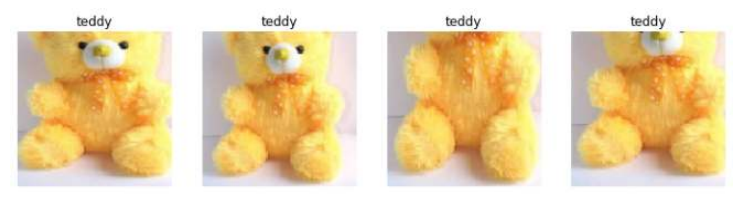


# Data Augmentation
Artificially expands a dataset by creating modified copies of existing data.
EX: 
- rotation
- flipping
- perspective warping
- brightness changes
- contrast changes
### Code EX:
```python
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)
```

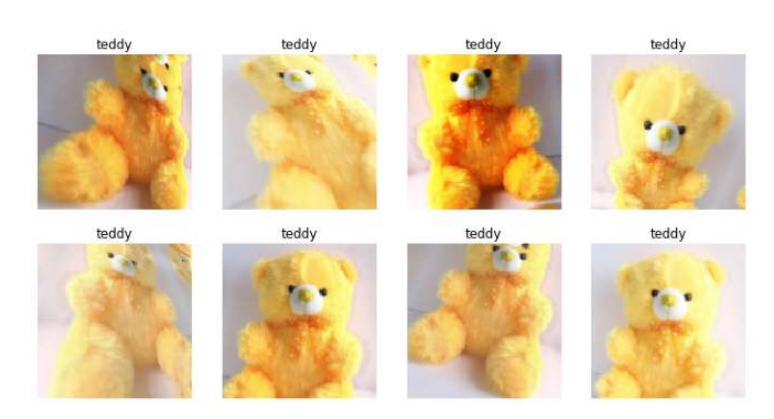

# Training the model
```python
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)
```

## confusion matrix of Bears classification example: explaination
```python
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
```
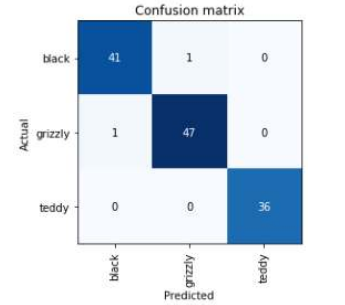

The `rows` represent the bears types in our data set black,grizzly and teddy.

The `Columns` represent the images that the model predicted as black,grizzly and teddy.

The `diagonal` of the matrix shows the images that were classified correctly,and `off-diagonal` cells represent images were classified incorrectly.

this helps to see where exactle our errors are ocurring. to see wheater its a `dataset problem`  (e.g., images that aren’t bears at all, or are labeled incorrectly) or a `model problem`  (perhaps it isn’t handling images taken with unusual lighting, or from a different angle, etc.).To do this, we can sort our images by their `loss`.

### Loss
Is a number that is higher if the model is incorrect (especially if it’s also confi‐dent of its incorrect answer) discussed in details in PART2.
we’ll learn in depth how loss is calculated and used in the
training process. For now, `plot_top_losses` shows us the images, Each labled with : 
- Prediction
- Target (Actual label)
- LOSS
- Probability : Confidince level from 0 to 1 
 
```python 
interp.plot_top_losses(5, nrows=1)
```
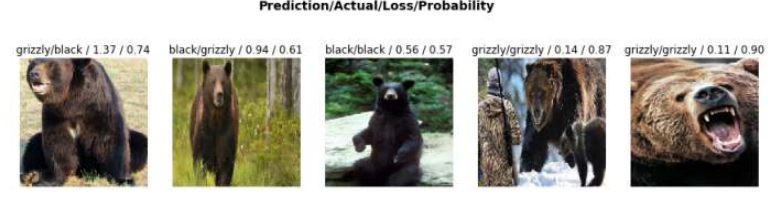

----
# Turning Your Model into an Online Application
### Using the Model for Inference
After training a model that perform ceratin task we need to save it then we copy it over a server to use in production. 
The model consist of two parts:
- The Architecture
- The trained parameters
the easiest way to save a model is to save both of these, when we load the model we make sure that we match the Architecture and parameters.Using `export` method in `fastai`.

 ```python
learn.export() # fastai will save a file called export.pkl:

path = Path()
path.ls(file_exts='.pkl') #check that the file exists
 ```

When we use a model for getting predictions, instead of training, we call it `inference`.
to load a model we use `load_learner`
```python
learn_inf = load_learner(path/'export.pkl') # Load the model
learn_inf.predict('images/grizzly.jpg')# make predictions for one image

# ('grizzly', tensor(1), tensor([9.0767e-06, 9.9999e-01, 1.5748e-07])) [predicted_class,index,prob,]
```

The model says that the image is a grizzly with 1.00 prob.


---
# Issues with Deep learning model's behavior
in Neural Network, the behavior emrges from the model's attempt to match the training set data, rather than being exactly defined. This can result in disaster

Ex : in the previos  bear detection system that will be attached to video cameras around campsites in national
parks and will warn campers of incoming bears.Id we used a model with dataset downloaded from `Bing Image Search API` we will face many kinds of problems such as : 

- Working with video data instead of images
- Handling nighttime images, which may not appear in this dataset
- Dealing with low-resolution camera images
- Ensuring results are returned fast enough to be useful in practice because its a real time system
-  Recognizing bears in positions that are rarely seen in photos that people post online (for example from behind, partially covered by bushes, or a long way away from the camera)

To make the system useful we need to collect the photos and create the dataset and do the labeling by Ourself.

This is one example of more general problems of $out-of-domain$ data.

Another issue is the $domain-shift$,happens when the type of data the model trained on changes over time.


Out-of-domain data and domain shift are examples of a larger problem,And there are ways to mitigate these risks using a carefully `thought-out process`

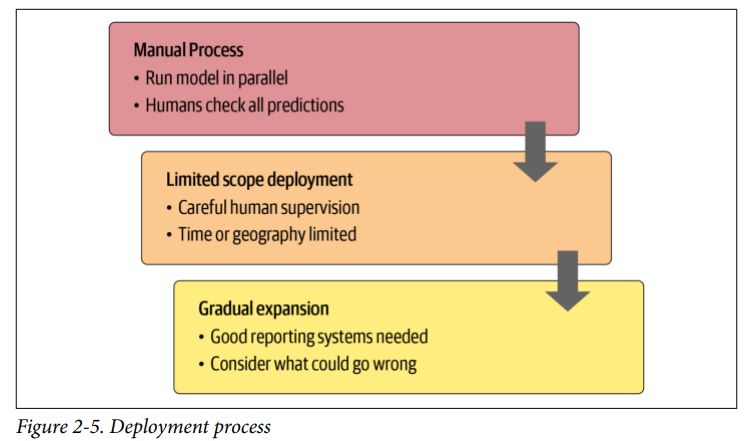

1-Manual process :Deep learning model running in parallel but not being used directly. The human involved in the process to check the output wheather they make sense.

2-Limit the scope of the model before it goes out :do a small geographically and time-constrained trial of
the model-driven approach.

3- Gradual expansion:gradually increase the scope of your rollout, we must ensure we have a really good reporting system in place,to make sure that you are aware of any significant changes to the actions being taken compared to your manual process.




# Chapter 2: From Model to Production

## Starting Your Project
Working on a real project gives you real experience in building and using models. When selecting a project, the most important consideration is <span style="color: red;">Data Availability</span>.

## Computer Vision
Deep learning has achieved great success in various computer vision tasks:

* **Object Recognition:** Computers can recognize items in an image.
* **Object Detection:** Computers can recognize where objects are in an image, highlight their locations, and name each found object.
    * **Segmentation:** A specialized task where every pixel is categorized based on the kind of object it is part of.

### Data Limitations
Deep learning algorithms are generally not good at recognizing images that are significantly different in structure from those used to train the model.
* *Example:* If there were no black-and-white images in the training data, the model may do poorly on black-and-white images in production.

### Data Augmentation
**Data Augmentation** refers to synthetically expanding a dataset by creating modified copies of existing data (such as rotating or flipping images). This technique helps to:
1.  Train machine learning models better.
2.  Prevent overfitting.
3.  Improve the ability to generalize to new, unseen data (especially when the original dataset is small).
---
# The Drivetrain Approach
The **Drivetrain Approach** is a strategic framework for building data products using AI. Its main goal is to ensure that data is used to produce **actionable results** rather than just generating predictions.

### Core Idea
The basic idea is to start with considering your objective, then think about what actions you can take to meet that objective and what data you have (or can acquire) that can help, and then build a model that you can use to determine the best actions to take to get the best results in terms of your objective

<div align="center">
  <img src="https://github.com/SalehBaderah/fastai-deep-learning-journey/blob/main/Images/Screenshot%202026-01-11%20151250.png" width="400" alt="Drivetrain">
</div>

### The 4 Steps of the Drivetrain Approach

1.  **Define the Objective**
    * *What is the specific result we want to achieve?*
    * **Example:** For an e-commerce store, the goal isn't just to "predict sales" (which is passive), but to "maximize net profit" (which is actionable).

2.  **Define the Levers**
    * *What are the inputs we can control or change to influence the objective?*
    * **Example:** The price of a product, the placement of an ad, or the recommendation shown to a user.

3.  **Collect the Data**
    * *What data do we need to link the "Levers" to the "Objective"?*
    * You need data that shows how changing the levers affects the outcome. If you don't have this data, you may need to run experiments to generate it.

4.  **Build the Model**
    * The models in this approach don't just predict the future; they predict how pulling different levers will impact the objective.
    * **Example:** Build a model that predicts: *"If we set the price to 100, we sell 50 units. If we set it to 90, we sell 80 units."*
    * **Action:** You then use these predictions to pick the exact price (lever) that results in the highest total profit (objective).

---
# Gathering Data
For many types of projects, you might find the data you need online (e.g., Kaggle). However, it is crucial to remember that **models can reflect only the data used to train them**. If the data is biased, the model will be biased. Therefore, we must carefully consider the types and sources of our data.
# From Data to DataLoaders
- `DataLoader`: is a class that prepare the data we pass to it by making a training set and validation set.
  
Later in the book we will cover :
  - What kinds of data we are working with?
  - How to get the list of items
  - How to label these items
  - How to create the validation set

### Independent & Dependent variables
 **Independent Variable ($x$):** The data we use to make predictions (e.g., the image).
 **Dependent Variable ($y$):** The target or label we want to predict (e.g., the type of bear).


### Image Resizing
**`Resize`:** Using `Resize(128)` crops the images to fit a square shape. This can result in losing important details if the object is cut out.

**`RandomResizedCrop`:** This is the preferred solution for training. It randomly selects a part of the image and crops it. Since we select a different part of the image in each epoch, the model learns to focus on and recognize different features of the object.

**Code Example on RandomResizedCrop:**
```python
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)
```
![image.png](attachment:22b08be0-86b4-4f0a-a8a9-24f5a918f7ff.png)

### Data Augmentation
Artificially expands a dataset by creating modified copies of existing data.
EX: 
- Rotation
- Flipping
- Perspective warping
- Brightness changes
- Contrast changes

**Code Example:**
```python
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)
```

![image.png](attachment:22b08be0-86b4-4f0a-a8a9-24f5a918f7ff.png)

# Training the model
After we prepare the data we create a learner and fine-tune it.

```python
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)
```
## Interpretation: **Confusion Matrix**
To understand where the model is making mistakes
```python
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
```
![image.png](attachment:e4424628-8481-4aff-bf7a-d739811eb70f.png)

- **Rows**:Represent the Actual labels (the true types of bears in our dataset).
- **Columns**:Represent the Predicted labels (what the model thought the images were)
- **Diagonal**:Shows images classified correctly
- **Off-diagonal**:Shows images classified incorrectly

This helps us pinpoint exactly where errors are occurring. We can determine if it is:
1.   A Dataset Problem: e.g., images that aren't bears at all, or are labeled incorrectly.
2.   A Model Problem: e.g., the model fails on images with unusual lighting or weird angles

## Analyzing loss
To distinguish between these problems, we can sort images by their Loss. Loss is a number that indicates how "wrong" the model is. The loss is higher if the model is incorrect, and especially high if the model is confident about its incorrect answer.

We use `plot_top_losses` to see the images with the highest loss. Each image is labeled with:
1. **prediction**: What the model guessed
2. **Target: The** actual correct label.
3. **Loss**: The calculated error value.
4. **Probability**: The model's confidence level (from 0 to 1).
```python 
interp.plot_top_losses(5, nrows=1)
```
![image.png](attachment:6ada6f69-4b28-48aa-a481-b89640439342.png)

# Turning Your Model into an Online Application
---
### Using the Model for Inference
After training a model to perform a certain task, we need to save it and then copy it to a server to use in production.

A deep learning model generally consists of:
1.  **The Architecture:** The structure of the layers.
2.  **The Trained Parameters:** The weights learned during training.
3.  **The Data Transformations:** The definition of how to process input data (e.g., resizing, cropping).

The easiest way to save a model in fastai is to use the `export` method. This saves all the necessary components (architecture, parameters, and transform definitions) into a single file.
```python
learn.export() # fastai will save a file called 'export.pkl'

path = Path()
path.ls(file_exts='.pkl') # Check that the file exists
```
## Inference
When we use a model to get **predictions** rather than for training, we call this process Inference.
To load the model for inference, we use `load_learner`

```python
learn_inf = load_learner(path/'export.pkl') # Load the model
learn_inf.predict('images/grizzly.jpg')# make predictions for one image

# OUTPUT (Returned values from .predict)

# ('grizzly', tensor(1), tensor([9.0767e-06, 9.9999e-01, 1.5748e-07])) [predicted_class,index,prob,]
```
1. Predicted Class: The label of the prediction (e.g., 'grizzly')
2. Label Index: The internal index of the category (e.g., tensor(1)).
3. Probabilities: A tensor containing the probability for each category
the model predicts the image is a grizzly with a probability of ~1.00 (99.99%)
---
# Issues with Deep learning model's behavior
In a Neural Network, behavior emerges from the model's attempt to match the training data, rather than being explicitly programmed or defined. This reliance on data can result in disaster if the training environment does not match the real-world environment.

### Example: The Bear Detection System
Consider the bear detection system, designed to warn campers in national parks.
If we train a model using a dataset downloaded from the `Bing Image Search API`, but deploy it on video cameras around campsites, we will face several significant problems:

* **Video vs. Images:** We are working with video data in production, but trained on static images.
* **Lighting Conditions:** Dealing with nighttime images, which likely do not appear in the "perfect" Bing search results.
* **Resolution:** Handling low-resolution security camera images compared to high-resolution web photos.
* **Latency:** Ensuring results are returned fast enough to be useful (inference speed) because it is a real-time system.
* **Unusual Poses:** Recognizing bears in positions rarely seen in online photos (e.g., from behind, partially covered by bushes, or far away from the camera).

**The Solution:** To make the system useful, we cannot rely on web scraping. We need to collect the photos, create the dataset, and do the labeling ourselves to match the production environment.


### Data problems
1.  **Out-of-Domain Data:**
    This occurs when the data the model sees in production is fundamentally different from the data it saw during training (e.g., Training on internet photos vs. Production on security camera footage).

2.  **Domain Shift:**
    This happens when the type of data the model was trained on changes over time (e.g., consumer behavior changing, or seasonal changes in images).
---

## Mitigation Strategies
Out-of-domain data and domain shift are examples of the larger problem that we can never fully anticipate every behavior of a neural network. However, we can mitigate these risks using a carefully **thought-out process** for deployment:

![image.png](attachment:88e32a42-980d-4b16-b6ed-d4a2bcc0aa62.png)

**Manual Process (Human in the loop)**
    Run the deep learning model in parallel with human operators. Do not use the model to drive actions directly yet. Instead, have humans check the model's output to verify whether it makes sense.

2.  **Limit the Scope**
    Before a full rollout, conduct a controlled trial. Limit the scope geographically (e.g., one specific campsite) or by time to test the model-driven approach safely.

3.  **Gradual Expansion**
    Gradually increase the scope of your rollout.
    * **Crucial Step:** Ensure you have a robust reporting system in place.
    * **Goal:** You must be aware of any significant changes to the actions being taken compared to your manual process to catch errors early.

# Chapter 3 : Data Ethics
---

### The Core Argument
The authors argue that machine learning models are not objective or neutral. Because they are trained on data created by humans, they often reflect human mistakes and prejudices. Since deep learning is used at a massive scale (affecting millions of people), small errors or biases in the code can cause significant harm in the real world.

### 1. Key Ethical Issues
The chapter categorizes the main problems into three areas:

* **Feedback Loops:**
    This occurs when an algorithm's predictions change the real world, which then creates new data that reinforces the original prediction.
    * *Example:* YouTube's recommendation engine tried to maximize "watch time." It learned that extreme content kept people glued to the screen, so it recommended more of it. This radicalized users, which created more data suggesting they *wanted* extreme content, creating a vicious cycle.

* **Bias:**
    Algorithms often reproduce existing societal problems because they learn from imperfect data.
    * **Historical Bias:** If historical data reflects racism or sexism (e.g., higher arrest rates for certain groups due to systemic issues), the model will learn to make decisions based on those disparities.
    * **Representation Bias:** If the training data doesn't represent the whole population, the model will fail for the underrepresented groups. (e.g., ImageNet having mostly Western images, causing models to fail at recognizing objects in developing countries).
    * **Measurement Bias:** This happens when we measure a *proxy* instead of the real thing. (e.g., predicting "who will have a stroke" based on "who visited the doctor." This ignores people who had strokes but couldn't afford a doctor).

* **Disinformation:**
    Deep learning makes it easy to generate fake text and images (deepfakes) cheaply and quickly. This allows bad actors to flood the internet with false information, eroding trust in shared reality.

### 2. Why Do These Problems Happen?
* **Metric Fixation:** Companies often optimize for a single number (like clicks, engagement, or speed) and ignore the social impact or "externalities."
* **Homogeneous Teams:** The tech industry largely consists of people from similar backgrounds (often young, white, male). These teams have "blind spots"—they often don't anticipate how a product might harm women, minorities, or older people because they don't share those life experiences.
* **Lack of Context:** Engineers often build models in a bubble without understanding the complex social environment where the model will actually be deployed.

### 3. How to Fix It
The authors suggest we move beyond just "good intentions" and implement structural changes:

* **Ethical Analysis:** Teams should assume things will go wrong. Before building, ask:
    * *"Who could be hurt by this?"*
    * *"What would a bad actor do with this?"*
* **Recourse:** There must be a "human in the loop." If an AI denies someone a loan or flags them for fraud, there must be a way for that person to appeal the decision to a human.
* **Diversity:** Hiring diverse teams is a safety feature. It increases the chance that someone in the room will spot a potential problem before the product ships.
* **Regulation:** Just as the car industry resisted seatbelts until laws required them, the tech industry likely needs regulation to ensure safety.
